In [1]:
import pandas as pd                                       #to load data from csv file & to delete columns & to handle missing values
import numpy as np                                        #to traet with numbers & helps with mathematical operations & importanat for working with arrays
import matplotlib.pyplot as plt                           #to visualize the data through Histogram and Scatter plot
from sklearn.model_selection import train_test_split      #to train and test the data
from sklearn.linear_model import LinearRegression         #to predict using linear equation
from sklearn.metrics import mean_squared_error, r2_score  #evaluate how good the model is



In [3]:
data = pd.read_csv("car_prediction_data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data = data.dropna() #to delete any missing values

In [5]:
def extract_brand(name):
    return name.split()[0].lower().strip()

data['Brand'] = data['Car_Name'].apply(extract_brand)
data = data.drop('Car_Name', axis=1)

data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Brand_activa,...,Brand_suzuki,Brand_swift,Brand_sx4,Brand_tvs,Brand_um,Brand_verna,Brand_vitara,Brand_wagon,Brand_xcent,Brand_yamaha
0,2014,3.35,5.59,27000,0,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2013,4.75,9.54,43000,0,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2,2017,7.25,9.85,6900,0,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2011,2.85,4.15,5200,0,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,2014,4.60,6.87,42450,0,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False


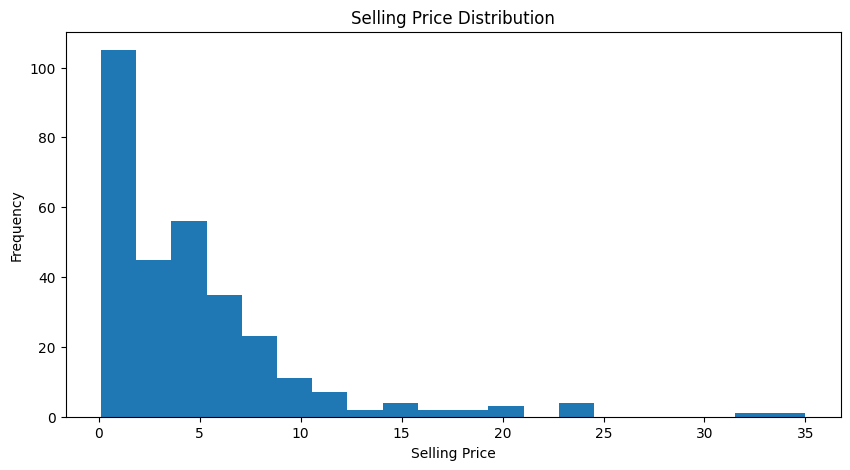

In [6]:
plt.figure(figsize=(10,5))
plt.hist(data['Selling_Price'], bins=20)
plt.title("Selling Price Distribution")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

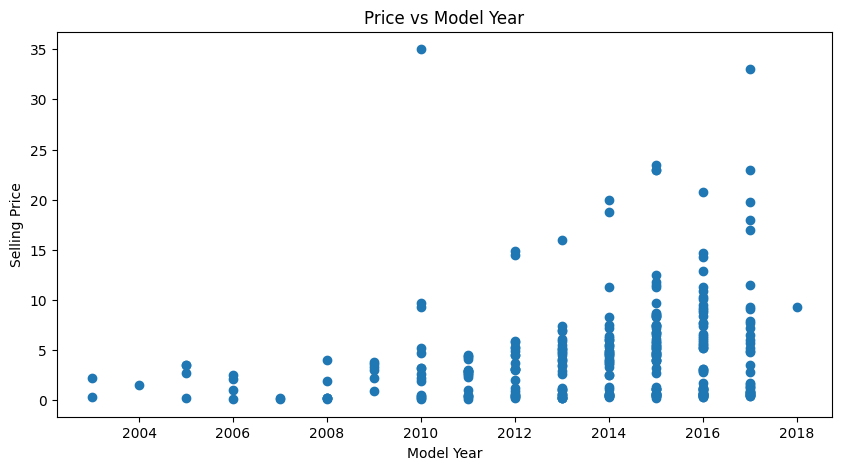

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(data["Year"], data["Selling_Price"])
plt.title("Price vs Model Year")
plt.xlabel("Model Year")
plt.ylabel("Selling Price")
plt.show()

In [8]:
X = data_encoded.drop("Selling_Price", axis=1)#get all the columns except selling price column
y = data_encoded["Selling_Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)#0.2-->80% for train & 20% for test

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100

print("Model Performance:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Model Performance:
Mean Squared Error (MSE): 3.4585866911815715
R² Score: 84.98589567746731
